In [1]:
import pandas as pd
from chainconsumer import ChainConsumer

bxa_df = pd.read_csv('results_df/bxa.csv').drop(columns=['Unnamed: 0'])
sixsa_mri_df = pd.read_csv('results_df/sixsa_mri_summary.csv').drop(columns=['Unnamed: 0'])
#sixa_sri_df = pd.read_csv('results_df/bxa.csv').drop(columns=['Unnamed: 0'])


Parameter kT in chain BXA is not constrained


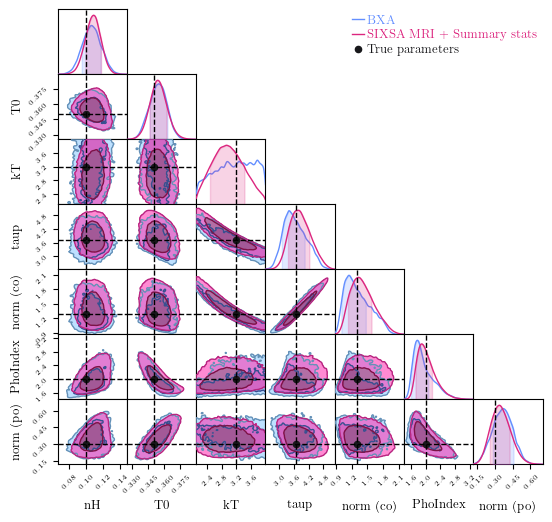

In [2]:
from chainconsumer import Chain, ChainConsumer, Truth


colors = ["#fe6100", "#785ef0", "#ffb000",  "#dc267f",  "#648fff"]

truth_loc = {'nH': 0.1,
 'T0': 0.35,
 'kT': 3.2,
 'taup': 3.7,
 'norm (co)': 1.3,
 'PhoIndex': 2.0,
 'norm (po)': 0.3
         }

bxa_chain = Chain(samples=bxa_df, name="BXA", color=colors[4])
sixsa_mri_chain = Chain(samples=sixsa_mri_df, name="SIXSA MRI + Summary stats", color=colors[3])


from chainconsumer import PlotConfig

cc = ChainConsumer()

cc.set_plot_config(
    PlotConfig(
        usetex=True,
        label_font_size=9,
        tick_font_size=5,
        serif=True,
    )
)

cc.add_chain(bxa_chain)
cc.add_chain(sixsa_mri_chain)
cc.add_marker(location=truth_loc, name="True parameters", color="black", marker_style="o", marker_size=20)
cc.add_truth(Truth(location=truth_loc, color="black"))
fig = cc.plotter.plot(figsize=(6, 6))
fig.align_ylabels()
fig.align_xlabels()
fig.savefig("figures/bxa_comparison.pdf", bbox_inches='tight')